In [13]:
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve
import os
import matplotlib.pyplot as plt

In [14]:
# Define the oncogene and the cancer types
pred_oncogene = "MDM2" #MDM2 or CDK4
pred_cancer_types = ["LGG", "GBM"] #only tumor categories that have labels in EGFR and either MDM2 and CDK4

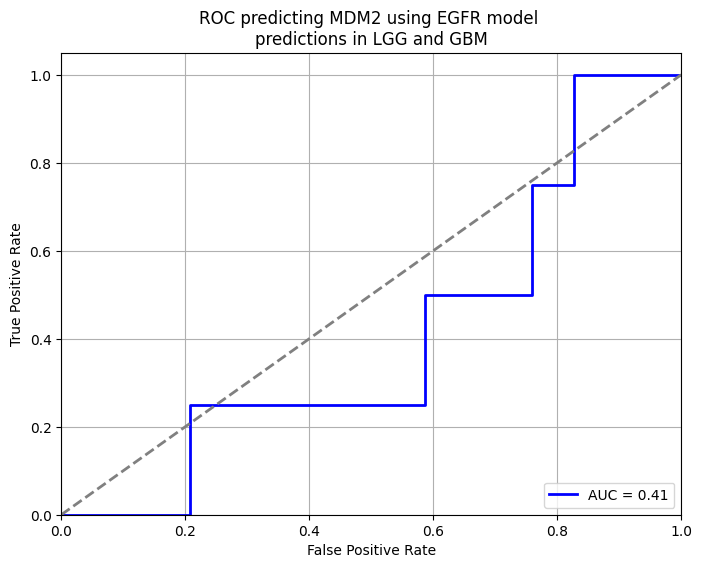

In [15]:
# Calculate the ROC and AUC for the combined data
all_predictions = pd.read_csv(f"../Data/Figure_Reproduce/{pred_oncogene}_predictions_using_EGFR_model_in_LGG_GBM_samples.csv")
y_true_combined = all_predictions.iloc[:, 1]  # Replace with the correct column if needed
y_pred_combined = all_predictions['EGFR_model_predictions']

fpr_combined, tpr_combined, _ = roc_curve(y_true_combined, y_pred_combined)
auc_combined = roc_auc_score(y_true_combined, y_pred_combined)

# Plot the ROC curve for the combined data
plt.figure(figsize=(8, 6))
plt.plot(fpr_combined, tpr_combined, color='blue', lw=2, label=f'AUC = {auc_combined:.2f}')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC predicting {pred_oncogene} using EGFR model \npredictions in LGG and GBM')
plt.legend(loc='lower right')
plt.grid(True)